# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import networkx as nx

## LIBRARIES
1. pandas: use for dataframe process
2. matplotlib: to visualize data
3. seaborn: to visualize data
4. Counter: count of each of the elements present in the container
4. networkx:construct a network

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv',
                   sep=',')

## Analyze the data
 We pull the data from the url
This is a dataset on top grossing movies. First column is the name of the movie, second column is the category of the movie, third one is the main production studio , fourth column is audience favorability rating in percentage then movie's profitability and rotten Tomatoes score in percentage the last column is release year.

In [3]:
data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


## bar chart
Counting  top grossing movies each studio made using Counter. We get the keys and values and to be able to bar chart, we convert from dictionary to list 

<BarContainer object of 13 artists>

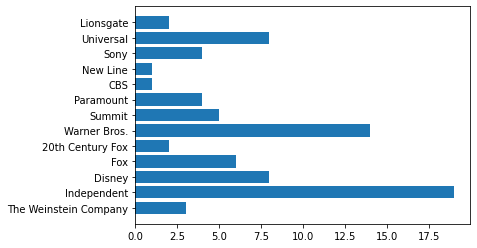

In [4]:
raw = Counter(data['Lead Studio'])
labels = list(raw.keys())
values = list(raw.values())
plt.barh(labels,values)

## Pie chart
with using the same values we make a pie chart.

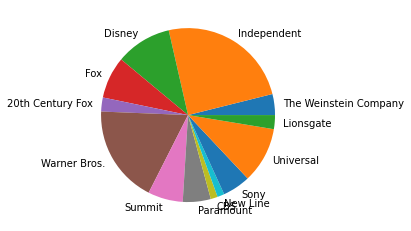

In [5]:
plt.pie(values, labels = labels)
plt.rcParams['figure.figsize'] = 15,7
plt.show() 

## Cross-tabulation
I make a cross-tabulation with movies' genre and release year using crosstab. When I examine the data there are same genres in different row because of typo. To fix that I turn all uppercase letter to lowercase then replaced the typos with correct one. Then I cross-tabulate again.

In [6]:
cross = pd.crosstab(data['Genre'], data['Year'])
cross

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comdy,0,1,0,0,0
Comedy,6,12,6,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,4,2,0,0,7
Romence,0,0,0,0,1
comedy,0,0,1,0,0


In [7]:
data['Genre']=data['Genre'].str.lower()
data['Genre']=data['Genre'].replace("comdy","comedy")
data['Genre']=data['Genre'].replace("romence","romance")

In [8]:
cross = pd.crosstab(data['Genre'], data['Year'])
cross

Year,2007,2008,2009,2010,2011
Genre,,,,,
action,0,0,0,1,0
animation,0,1,0,1,2
comedy,6,13,7,16,1
drama,0,3,5,2,3
fantasy,0,1,0,0,0
romance,5,2,0,0,8


## Heat-map
I made a heat-map using seaborn library function heatmap.

<AxesSubplot:xlabel='Year', ylabel='Genre'>

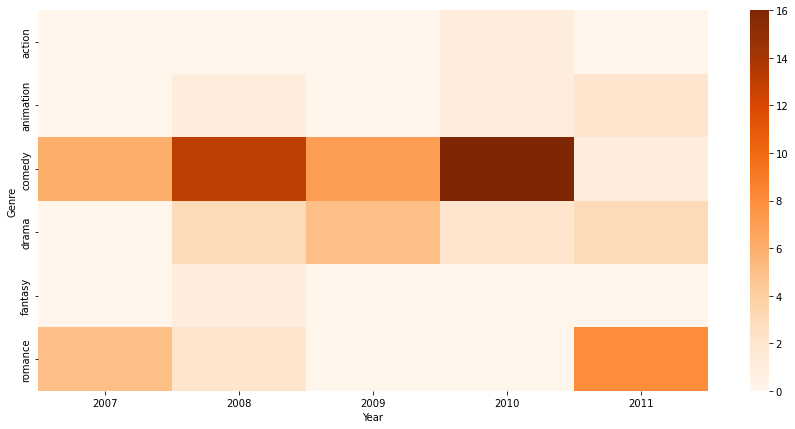

In [9]:
sns.heatmap(cross, cmap='Oranges')


## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat',
                   sep=',')
data

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67658,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67659,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67660,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


## Analyze the data
The data has a row value as it column names. So I took that values and placed end of the dataframe.

In [11]:
data.columns=['Airline' ,'Airline ID', 'Source airport','Source airport ID' ,'Destination airport','Destination airport ID','Codeshare','Stops','Equipment' ]
data.loc[data.shape[0]] = ['2B','410','AER','2965','KZN','2990',None,'0','CR2' ]

# Count of flights 
The number of flights from source to target I add source and destination airport together. Then count the flights with using Counter library.

In [12]:
data['routes'] = data[['Source airport', 'Destination airport',]].agg('-'.join, axis=1) 

In [13]:
Routes=Counter(data['routes'])

In [14]:
routes = pd.DataFrame.from_records(list(dict(Routes).items()), columns=['Routes','number of flights'])

Then I create a dataframe contains routes and number of flights. Then I split routes column to source and destinatation airport.

In [15]:
routes[["Source airport", "Destination airport"]]=routes["Routes"].str.split(pat="-", expand=True)

For a better view I create another dataframe contains source airport,destination airport and number of flights.

In [16]:
df=routes[['Source airport','Destination airport','number of flights']]
df

,Source airport,Destination airport,number of flights
0,ASF,KZN,1
1,ASF,MRV,1
2,CEK,KZN,1
3,CEK,OVB,2
4,DME,KZN,4
...,...,...,...
37590,WGA,MEL,1
37591,WIN,LRE,1
37592,WIN,TSV,1
37593,WYA,ADL,1


I found all rows where the number of flights is 10 or more and added that rows to a new data frame.

In [17]:
data_filt=df.loc[df['number of flights'] >= 10]
data_filt

,Source airport,Destination airport,number of flights
378,BKK,SIN,10
386,KUL,SIN,10
401,SIN,KUL,10
608,CGO,HGH,10
649,CKG,XIY,10
...,...,...,...
14208,HKG,BKK,12
22433,CGK,SIN,10
22465,DPS,SIN,10
22532,SIN,CGK,10


# Networkx
I created a network using the source and destination airport in the filtered data. nx.from_pandas_edgelist using for changing dataframe to edgelist.

In [18]:
G=nx.from_pandas_edgelist(data_filt, 'Source airport', 'Destination airport')

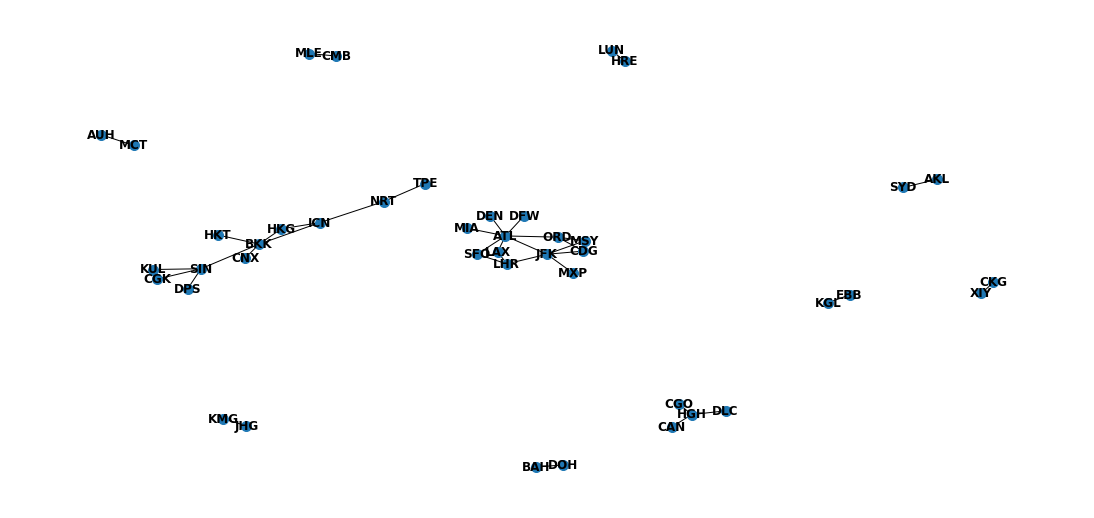

In [19]:
nx.draw(G ,with_labels=True ,font_weight='bold', node_size= 100)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

In [20]:
data= pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv',
                   sep=',')

In [21]:
data

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I look at the column names in the data to understand the data more easily. 

In [22]:
print(data.columns)

Index(['URL', 'GameType', 'Location', 'Date', 'Time', 'WinningTeam', 'Quarter',
       'SecLeft', 'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss', 'Unnamed: 40'],
      dtype='object')


# Function 1
I took the data and game type. Firstly I filtered the data by given gametype. Then count assister,blocker and rebounder from the filtered data. I convert each one to dataframe and at last merge all of them to one dataframe.

In [23]:
def function1(data, gt):
    data_filt=data.loc[data['GameType'] == gt]
    Assister=Counter(data_filt['Assister'])
    Blocker=Counter(data_filt['Blocker'])
    Rebounder=Counter(data_filt['Rebounder'])
    assister = pd.DataFrame.from_records(list(dict(Assister).items()), columns=['Players','assists'])
    blocker = pd.DataFrame.from_records(list(dict(Blocker).items()), columns=['Players','blocks'])
    rebounder = pd.DataFrame.from_records(list(dict(Rebounder).items()), columns=['Players','rebounds'])
    df=assister.merge(blocker,how='outer', on='Players')
    df=df.merge(rebounder,how='outer', on='Players')
    return df

# Function 2
I took the data and game type. Firstly I filtered the data by given gametype. Then count the winning team from the filtered data and convert it to a dataframe.   

In [24]:
def function2(data,gt):
    data_filt=data.loc[data['GameType'] == gt]
    Winner=Counter(data_filt['WinningTeam'])
    winner = pd.DataFrame.from_records(list(dict(Winner).items()), columns=['Team','win'])
    return winner

List of players, the number of asists, blocks and rebounds for regular games

In [25]:
function1(data,'regular')

,Players,assists,blocks,rebounds
0,NaN,449110.0,490418.0,388025.0
1,F. VanVleet - vanvlfr01,357.0,17.0,203.0
2,B. Ingram - ingrabr01,259.0,38.0,380.0
3,J. Holiday - holidjr01,408.0,48.0,293.0
4,L. Ball - balllo01,437.0,38.0,383.0
...,...,...,...,...
525,D. Hannahs - hannadu01,NaN,NaN,1.0
526,J. Uthoff - uthofja01,NaN,NaN,6.0
527,T. Zeller - zellety01,NaN,NaN,4.0
528,K. Alexander - alexaky01,NaN,NaN,3.0


List of players, the number of asists, blocks and rebounds for playoff games

In [26]:
function1(data,'playoff')

,Players,assists,blocks,rebounds
0,NaN,34660.0,37749.0,29956.0
1,D. Mitchell - mitchdo01,34.0,2.0,35.0
2,J. Murray - murraja01,126.0,6.0,92.0
3,J. Ingles - inglejo01,33.0,1.0,24.0
4,N. Jokić - jokicni01,109.0,15.0,187.0
...,...,...,...,...
204,J. Jackson - jacksju01,NaN,NaN,3.0
205,A. Cleveland - clevean01,NaN,NaN,1.0
206,C. Clemons - clemoch01,NaN,NaN,2.0
207,C. Edwards - edwarca01,NaN,NaN,1.0


The list of teams and the number of wins regular games

In [27]:
regular=function2(data,'regular')
regular

,Team,win
0,TOR,24986
1,LAC,23744
2,CHO,10527
3,DET,9047
4,ORL,15176
5,MIN,9513
6,MIA,20460
7,PHI,20118
8,DAL,20127
9,SAS,15121


The list of teams and the number of wins playoff games

In [28]:
playoff=function2(data,'playoff')
playoff

,Team,win
0,DEN,3981
1,TOR,3282
2,BOS,4674
3,LAC,3216
4,ORL,494
5,MIA,6495
6,HOU,2298
7,POR,519
8,UTA,1306
9,DAL,1059


# Bar charts
I took team and number of wins as labels and values from data then visualized them.

Bar chart for regular games.

<BarContainer object of 30 artists>

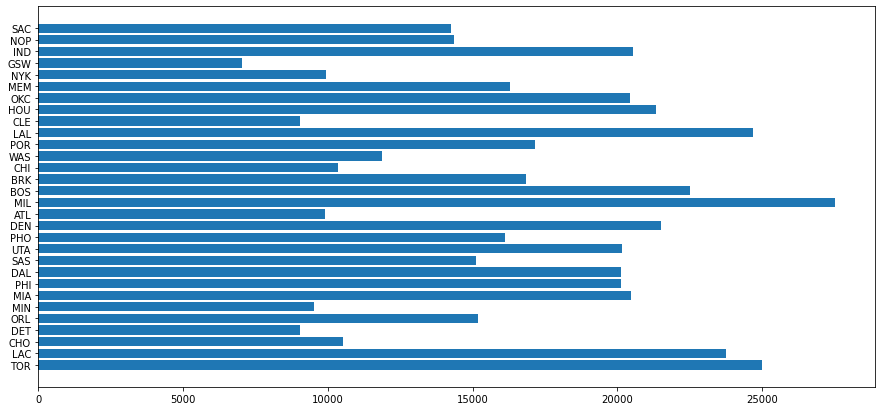

In [29]:
labels = regular['Team']
values= regular['win']
plt.barh(labels,values)

Bar chart for regular games.

<BarContainer object of 13 artists>

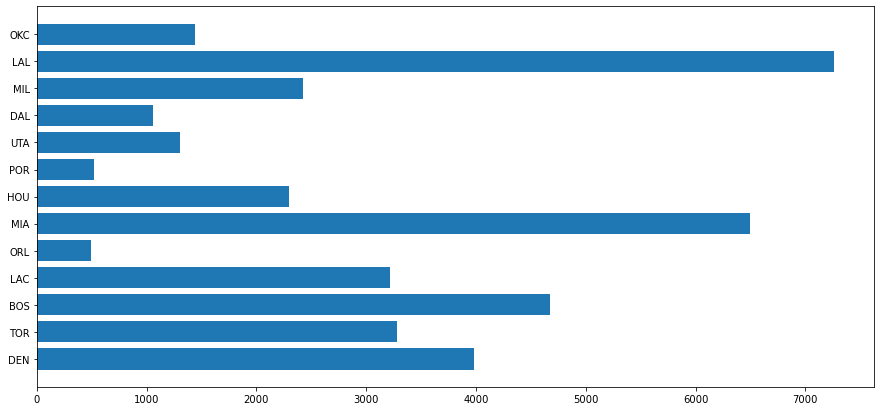

In [30]:
labels = playoff['Team']
values= playoff['win']
plt.barh(labels,values)